# LeetCode

## 542. 01 Matrix

https://leetcode.com/problems/01-matrix/?envType=study-plan&id=algorithm-i


**Description**

    Given an m x n binary matrix mat, return the distance of the nearest 0 for each cell.
    The distance between two adjacent cells is 1.

**Examples**

    Example 1:
    
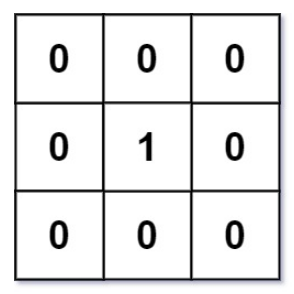


    Input: mat = [[0,0,0],[0,1,0],[0,0,0]]
    Output: [[0,0,0],[0,1,0],[0,0,0]]
    
    Example 2:
 
    
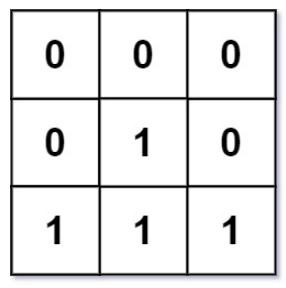

    Input: mat = [[0,0,0],[0,1,0],[1,1,1]]
    Output: [[0,0,0],[0,1,0],[1,2,1]]
    
    
**Constraints**

    m == mat.length
    n == mat[i].length
    1 <= m, n <= 104
    1 <= m * n <= 104
    mat[i][j] is either 0 or 1.
    There is at least one 0 in mat.    

In [51]:
from collections import deque

class Solution:
    def updateMatrix(self, mat: list[list[int]]):
        
        def bfs(mat, visited, queue):
            dx, dy = [1,-1,0,0], [0,0,1,-1]
            while queue:
                qx, qy = queue.popleft()
                for k in range(4):
                    nx, ny = qx+dx[k], qy+dy[k]
                    if 0<=nx<row and 0<=ny<col and visited[nx][ny]==-1:
                        visited[nx][ny] = visited[qx][qy]+1
                        queue.append((nx,ny))

        queue = deque()
        row, col = len(mat), len(mat[0])
        visited = [[-1]*col for _ in range(row)]
        
        for i in range(row):
            for j in range(col):
                if mat[i][j] == 0:
                    queue.append((i,j))
                    visited[i][j] = 0
        
        bfs(mat, visited, queue)
                    
        return visited

In [52]:
sol = Solution()
print(sol.updateMatrix([[0,0,0],[0,1,0],[0,0,0]]))
print(sol.updateMatrix([[0,0,0],[0,1,0],[1,1,1]]))
print(sol.updateMatrix([[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0]]))

[[0, 0, 0], [0, 1, 0], [0, 0, 0]]
[[0, 0, 0], [0, 1, 0], [1, 2, 1]]
[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]]


In [69]:
from collections import deque

maps = [[0,0,0],[0,1,0],[1,1,1]]

def bfs(mat, visited, queue):
    dx, dy = [1,-1,0,0], [0,0,1,-1]
    while queue:
        qx, qy = queue.popleft()
        for k in range(4):
            nx, ny = qx+dx[k], qy+dy[k]
            if 0<=nx<row and 0<=ny<col and visited[nx][ny]==-1:
                visited[nx][ny] = visited[qx][qy]+1
                queue.append((nx,ny))

queue = deque()
row, col = len(mat), len(mat[0])
visited = [[-1]*col for _ in range(row)]

for i in range(row):
    for j in range(col):
        if mat[i][j] == 0:
            queue.append((i,j))
            visited[i][j] = 0

bfs(mat, visited, queue)
visited

NameError: name 'mat' is not defined

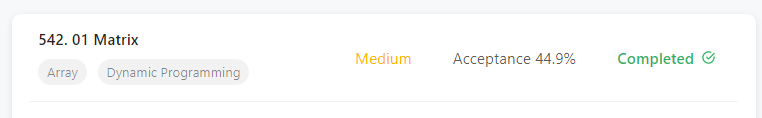

## 994. Rotting Oranges
https://leetcode.com/problems/rotting-oranges/?envType=study-plan&id=algorithm-i


**Description**

    You are given an m x n grid where each cell can have one of three values:

    0 representing an empty cell,
    1 representing a fresh orange, or
    2 representing a rotten orange.
    Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.

    Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.

 
**Example 1**

    Example 1:

    Input: grid = [[2,1,1],[1,1,0],[0,1,1]]
    Output: 4

    Example 2:
    Input: grid = [[2,1,1],[0,1,1],[1,0,1]]
    Output: -1
    Explanation: The orange in the bottom left corner (row 2, column 0) is never rotten, because rotting only happens 4-directionally.

    Example 3:
    Input: grid = [[0,2]]
    Output: 0
    Explanation: Since there are already no fresh oranges at minute 0, the answer is just 0.


**Constraints**


    m == grid.length
    n == grid[i].length
    1 <= m, n <= 10
    grid[i][j] is 0, 1, or 2.

In [88]:
from collections import deque

class Solution:
    def orangesRotting(self, grid: list[list[int]]):
        cnt = 0
        dx, dy = [1,-1,0,0], [0,0,1,-1]
        fresh, rottenQ = set(), deque()
        row, col = len(grid), len(grid[0])
        
        for i in range(row):
            for j in range(col):
                if grid[i][j] == 1:
                    fresh.add((i,j))
                if grid[i][j] ==2:
                    rottenQ.append((i,j,cnt))
                    
        while rottenQ:
            qx,qy,cnt = rottenQ.popleft()
            for k in range(4):
                nx, ny = qx+dx[k], qy+dy[k]
                if 0<=nx<row and 0<=ny<col and grid[nx][ny]==1:
                    grid[nx][ny]=2
                    fresh.remove((nx,ny))
                    rottenQ.append((nx,ny,cnt+1))
        return cnt if not fresh else -1

In [89]:
sol = Solution()
print(sol.orangesRotting([[2,1,1],[1,1,0],[0,1,1]]))
print(sol.orangesRotting([[2,1,1],[0,1,1],[1,0,1]]))

4
-1


In [78]:
from collections import deque

grid = [[2,1,1], [1,1,0], [0,1,1]]

dx,dy = [1,-1,0,0], [0,0,1,-1]                
fresh, rottenQ = set(), deque()
row, col = len(grid), len(grid[0])

for i in range(row):
    for j in range(col):
        if grid[i][j]==1:
            fresh.add((i,j))
        if grid[i][j]==2:
            rottenQ.append((i,j,0))

while rottenQ:
    qx, qy, cnt = rottenQ.popleft()
    for k in range(4):
        nx,ny = qx+dx[k],qy+dy[k]
        if 0<=nx<row and 0<=ny<col and grid[nx][ny]==1:
            grid[nx][ny]=2
            fresh.remove((nx,ny))
            rottenQ.append((nx,ny, cnt+1))
            

cnt

4

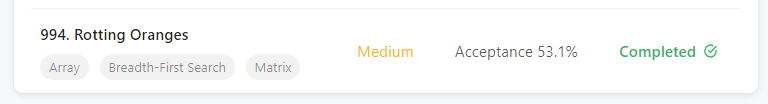